In [59]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt

In [60]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [61]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Data Science\\Research Work\\My DataSet\\dialogs.txt",names=('Query','Response'),sep=('\t'))

In [62]:
df

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


In [63]:
df.shape

(3725, 2)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [65]:
df.describe()

,Query,Response
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [66]:
df.nunique()

Query       3510
Response    3512
dtype: int64

In [67]:
df.isnull().sum()

Query       0
Response    0
dtype: int64

In [68]:
df['Query'].value_counts()

what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
me too.                                         7
                                               ..
you can yell at them.                           1
and they will yell back at you.                 1
yelling doesn't do any good.                    1
will you look at this form?                     1
but i do all my writing with my right hand.     1
Name: Query, Length: 3510, dtype: int64

In [69]:
df['Response'].value_counts()

what do you mean?                                                       22
why not?                                                                16
what happened?                                                          10
why is that?                                                             9
of course.                                                               8
                                                                        ..
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
mi stands for middle initial.                                            1
start typing instead. that way your left hand will do half the work.     1
Name: Response, Length: 3512, dtype: int64

In [70]:
Text=df['Query']

In [71]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [72]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)
        
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

hi, how are you doing?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm fine. how about yourself?
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.2023, 
i'm pretty good. thanks for asking.
neg: 0.0, neu: 0.25, pos: 0.75, compound: 0.8402, 
no problem. so how have you been?
neg: 0.495, neu: 0.505, pos: 0.0, compound: -0.5994, 
i've been great. what about you?
neg: 0.0, neu: 0.549, pos: 0.451, compound: 0.6249, 
i've been good. i'm in school right now.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
what school do you go to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i go to pcc.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you like it there?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
it's okay. it's a really big campus.
neg: 0.0, neu: 0.725, pos: 0.275, compound: 0.2263, 
good luck with school.
neg: 0.0, neu: 0.253, pos: 0.747, compound: 0.7096, 
how's it going?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm doing well. how about you?
neg: 0.0, neu: 0.704, pos: 0.2

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
those are great. how much were they?
neg: 0.0, neu: 0.594, pos: 0.406, compound: 0.6249, 
i got them for forty.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i think that you look very cute today.
neg: 0.0, neu: 0.646, pos: 0.354, compound: 0.5095, 
is that right? this is a brand new outfit.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what store did you get it from?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i went to macy's and picked it out.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i love your outfit right now.
neg: 0.0, neu: 0.488, pos: 0.512, compound: 0.6369, 
well, i think you look nice today too.
neg: 0.0, neu: 0.505, pos: 0.495, compound: 0.5994, 
thanks. i found these new shoes earlier at the store.
neg: 0.0, neu: 0.734, pos: 0.266, compound: 0.4404, 
i think that those are some really nice shoes. what kind are they?
neg: 0.0, neu: 0.606, pos: 0.394, compound: 0.7574, 
these are chucks.
neg: 0.0, neu: 1.0, pos: 0.0, compo

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i've been working too.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well regardless, i'm very happy that you came to see me.
neg: 0.0, neu: 0.596, pos: 0.404, compound: 0.7264, 
i'm really glad that you came to see me.
neg: 0.0, neu: 0.708, pos: 0.292, compound: 0.5095, 
i had to. i was missing you a lot.
neg: 0.306, neu: 0.694, pos: 0.0, compound: -0.296, 
i was missing you too.
neg: 0.423, neu: 0.577, pos: 0.0, compound: -0.296, 
so, why haven't you visited me?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i've actually been busy lately.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what have you been doing?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i've just been working really hard.
neg: 0.253, neu: 0.747, pos: 0.0, compound: -0.1761, 
i've also been busy.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
tell me what you've been doing.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
basically, i've been working too.
neg: 0.0, neu: 1.0, 

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but girls like guys who are funny.
neg: 0.0, neu: 0.413, pos: 0.587, compound: 0.7964, 
where are you going?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i have to walk the dog.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what kind of dog do you have?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i have a little poodle.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
poodles bark a lot.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they sure do.
neg: 0.0, neu: 0.465, pos: 0.535, compound: 0.3182, 
they bark at everything.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they never shut up.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why did you get a poodle?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's my mom's dog.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
so she likes poodles.
neg: 0.0, neu: 0.494, pos: 0.506, compound: 0.4728, 
can i borrow $5?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
sure. why do you need it?
neg: 0.0, ne

neg: 0.551, neu: 0.449, pos: 0.0, compound: -0.5996, 
yes, but a puppy needs shots.
neg: 0.0, neu: 0.684, pos: 0.316, compound: 0.2144, 
shots for what?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
so it won't get sick. just like you get shots.
neg: 0.0, neu: 0.606, pos: 0.394, compound: 0.6372, 
i hate shots.
neg: 0.787, neu: 0.213, pos: 0.0, compound: -0.5719, 
and a puppy eats food. food costs money.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
no problem. i'll give him food off my plate.
neg: 0.412, neu: 0.588, pos: 0.0, compound: -0.5994, 
look at all these kittens!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how many are there?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
eight.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're all so cute.
neg: 0.0, neu: 0.437, pos: 0.563, compound: 0.5949, 
yes, but i can't keep them.
neg: 0.0, neu: 0.684, pos: 0.316, compound: 0.2144, 
what are you going to do with them?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm going to give 

when is he coming?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll be glad when winter comes.
neg: 0.0, neu: 0.625, pos: 0.375, compound: 0.4588, 
why is that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
because i love the snow.
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.6369, 
yes, the snow is fun.
neg: 0.0, neu: 0.333, pos: 0.667, compound: 0.7184, 
last year we made a big snowman.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how big was it?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it was seven feet tall.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how long did it take?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it took us all day.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
did you give him a nose?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
of course. we gave him a big carrot for a nose.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm going to the bank.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what do you need to do?
neg: 0.0, neu: 1.0, pos: 0.0, compo

i don't like our flag.
neg: 0.413, neu: 0.587, pos: 0.0, compound: -0.2755, 
what's the matter with it?
neg: 0.0, neu: 0.784, pos: 0.216, compound: 0.0258, 
it's too much like other flags.
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.3612, 
yes, a lot of flags have stripes.
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
a flag should be pretty.
neg: 0.0, neu: 0.484, pos: 0.516, compound: 0.4939, 
what should our flag look like?
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.3612, 
it should have a pretty woman on it.
neg: 0.0, neu: 0.652, pos: 0.348, compound: 0.4939, 
that's ridiculous!
neg: 0.736, neu: 0.264, pos: 0.0, compound: -0.4199, 
you don't like pretty women?
neg: 0.612, neu: 0.388, pos: 0.0, compound: -0.5773, 
of course i do. but not on our flag!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
every nation should have a pretty woman on their flag.
neg: 0.0, neu: 0.714, pos: 0.286, compound: 0.4939, 
i had a busy morning.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
wha

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what are we waiting for?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
let me get the keys.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i have to go to the bathroom.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why didn't you go before we left?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i did, but i have to go again.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, hold on a little longer.
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.2732, 
i think i'm going to explode.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
just hold on.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh! don't hit any more bumps!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
we'll be at mcdonald's in just a few minutes.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i hope they are fast minutes.
neg: 0.0, neu: 0.58, pos: 0.42, compound: 0.4404, 
think about something else. think about a hamburger.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm thinking, b

neg: 0.268, neu: 0.732, pos: 0.0, compound: -0.296, 
no, it's a taste you have to get used to.
neg: 0.216, neu: 0.784, pos: 0.0, compound: -0.296, 
let's take a walk.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's the weather like?
neg: 0.0, neu: 0.545, pos: 0.455, compound: 0.3612, 
let me step outside and see.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's a little chilly, right?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, it is.
neg: 0.0, neu: 0.426, pos: 0.574, compound: 0.4019, 
i'll put on my cap.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
wear a jacket, too.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i wonder if i should bring my gloves.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
maybe you should, just in case it gets colder.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll put a glove in each pocket.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
we'll get warmer as we walk.
neg: 0.0, neu: 0.694, pos: 0.306, compound: 0.296, 
look at the car chase on 

neg: 0.239, neu: 0.761, pos: 0.0, compound: -0.296, 
okay, i give up.
neg: 0.0, neu: 0.513, pos: 0.487, compound: 0.2263, 
well, there is one good table.
neg: 0.0, neu: 0.444, pos: 0.556, compound: 0.6124, 
great. which one?
neg: 0.0, neu: 0.328, pos: 0.672, compound: 0.6249, 
i don't believe the art world.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what is it this time?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
an andy warhol drawing.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
he's a famous artist.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
he drew two butterflies and a flower on a napkin in a restaurant.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
did he sign it?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes.
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.4019, 
is it beautiful?
neg: 0.0, neu: 0.339, pos: 0.661, compound: 0.5994, 
it's just black ink on a white napkin. and the napkin has food stains!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
so it's not worth much?


neg: 0.0, neu: 0.755, pos: 0.245, compound: 0.0772, 
that should be a nice trip. lots of fun, and lots of food.
neg: 0.0, neu: 0.621, pos: 0.379, compound: 0.7269, 
i have no idea how much it will cost.
neg: 0.239, neu: 0.761, pos: 0.0, compound: -0.296, 
i think it depends on the season and on your cabin.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, of course i want to go when the weather is nice.
neg: 0.0, neu: 0.563, pos: 0.437, compound: 0.6369, 
yes, you don't want to travel in winter storms.
neg: 0.112, neu: 0.641, pos: 0.247, compound: 0.3565, 
and i want to get a big cabin with a view.
neg: 0.0, neu: 0.843, pos: 0.157, compound: 0.0772, 
are you going to travel alone?
neg: 0.286, neu: 0.714, pos: 0.0, compound: -0.25, 
no, my sister and i will travel together.
neg: 0.268, neu: 0.732, pos: 0.0, compound: -0.296, 
i hate to fly.
neg: 0.649, neu: 0.351, pos: 0.0, compound: -0.5719, 
because of all the security?
neg: 0.0, neu: 0.625, pos: 0.375, compound: 0.34, 
no, because 

neg: 0.21, neu: 0.484, pos: 0.306, compound: 0.1531, 
don't drink milk out of the carton. use a glass!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i like that shirt.
neg: 0.0, neu: 0.444, pos: 0.556, compound: 0.3612, 
so do i.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how much is it?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't know. the tag is missing.
neg: 0.306, neu: 0.694, pos: 0.0, compound: -0.296, 
ask the clerk.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i will.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh, look. here's another shirt just like it.
neg: 0.0, neu: 0.737, pos: 0.263, compound: 0.3612, 
does it have a price tag?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, it does. it's only $20.
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
that's a great price.
neg: 0.0, neu: 0.328, pos: 0.672, compound: 0.6249, 
i think i'll buy both of them.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i bought you a pair of pants.
neg: 0.0, neu: 1.0, pos: 0

neg: 0.0, neu: 0.602, pos: 0.398, compound: 0.5106, 
but he didn't have a chance. nobody voted for him!
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.3404, 
i don't know why i bother to vote.
neg: 0.0, neu: 0.711, pos: 0.289, compound: 0.2584, 
why's that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what good does it do?
neg: 0.0, neu: 0.58, pos: 0.42, compound: 0.4404, 
you get to put someone in power that you like.
neg: 0.0, neu: 0.783, pos: 0.217, compound: 0.3612, 
only if my candidate wins.
neg: 0.0, neu: 0.519, pos: 0.481, compound: 0.5719, 
well, he can't win unless you and others vote for him.
neg: 0.217, neu: 0.635, pos: 0.148, compound: -0.2434, 
but even if my candidate wins, he'll break his promises.
neg: 0.0, neu: 0.486, pos: 0.514, compound: 0.8573, 
that's true. they promise anything just so they get elected.
neg: 0.0, neu: 0.611, pos: 0.389, compound: 0.6249, 
and when elected, they go their own way.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they forget who put t

why did they do that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a mad dog bit most of her face off.
neg: 0.314, neu: 0.686, pos: 0.0, compound: -0.4939, 
oh, that's terrible. what does she look like now?
neg: 0.246, neu: 0.556, pos: 0.198, compound: -0.1531, 
her face is really fat, but they say the swelling will go down.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
and then will she look normal again?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i guess so.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
there's something wrong with my right hand.
neg: 0.274, neu: 0.442, pos: 0.283, compound: 0.0258, 
what's wrong with it?
neg: 0.508, neu: 0.492, pos: 0.0, compound: -0.4767, 
it aches most of the time.
neg: 0.286, neu: 0.714, pos: 0.0, compound: -0.25, 
what do you think it is?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't know. i think it's old age.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
if it's old age, why don't both of your hands hurt?
neg: 0.254, neu: 0.746, po

In [73]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

In [74]:
df

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [76]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [79]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="black",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

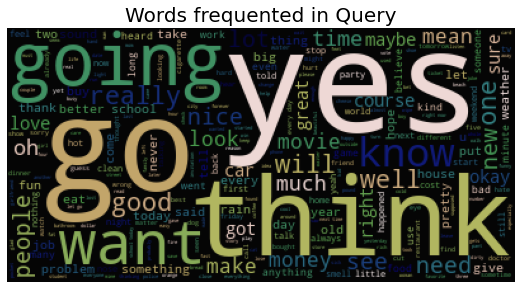

In [80]:
wordcloud(df,'Query')

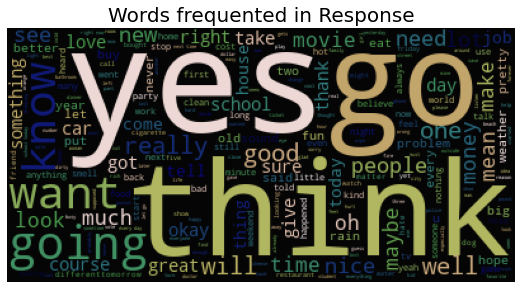

In [81]:
wordcloud(df,'Response')

In [82]:
import re

In [83]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [84]:
remove_n = lambda x: re.sub("\n", " ", x)

In [85]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

In [86]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

In [87]:
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [88]:
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [89]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right handed,0.000,0.707,0.293,0.4404
3721,are you right handed,yes all my life,0.000,1.000,0.000,0.0000
3722,yes all my life,you re wearing out your right hand stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


In [90]:
pd.set_option('display.max_rows',3800)

In [91]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
5,i ve been good i m in school right now,what school do you go to,0.000,0.707,0.293,0.4404
6,what school do you go to,i go to pcc,0.000,1.000,0.000,0.0000
7,i go to pcc,do you like it there,0.000,1.000,0.000,0.0000
8,do you like it there,it s okay it s a really big campus,0.000,0.615,0.385,0.3612
9,it s okay it s a really big campus,good luck with school,0.000,0.725,0.275,0.2263


In [92]:
imp_sent=df.sort_values(by='compound', ascending=False)

In [93]:
imp_sent.head(5)

,Query,Response,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that s what many people believe,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,exactly it seems like it s going to be loads ...,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,yes we need a relaxed president who thinks cl...,0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,well the democratic party says it was an hone...,0.0,0.482,0.518,0.8651


In [94]:
pos_sent=df.sort_values(by='pos', ascending=False)

In [95]:
pos_sent.head(5)

,Query,Response,neg,neu,pos,compound
1659,please,you know the rules,0.0,0.0,1.0,0.3182
1191,yes,no that s incomplete,0.0,0.0,1.0,0.4019
223,well congratulations,thank you,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you,0.0,0.0,1.0,0.3182


In [96]:
neg_sent=df.sort_values(by='neg', ascending=False)

In [97]:
neg_sent.head(5)

,Query,Response,neg,neu,pos,compound
1294,no,how do you know,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
154,no problem,did you need something,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


In [98]:
neu_sent=df.sort_values(by='neu', ascending=False)

In [99]:
neu_sent.head(5)

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,oh that s so delicious,0.0,1.0,0.0,0.0
1596,what is gravity,it s the force that pulls everything down,0.0,1.0,0.0,0.0
1597,it s the force that pulls everything down,i don t understand,0.0,1.0,0.0,0.0
1598,i don t understand,if you pour water into a glass the water goes...,0.0,1.0,0.0,0.0


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
tfidf = TfidfVectorizer()

In [102]:
factors = tfidf.fit_transform(df['Query']).toarray()

In [103]:
tfidf.get_feature_names()

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aids',
 'air',
 'airport',
 'aisle',
 'alarm',
 'alice',
 'alive',
 'all',
 'allergic',
 'alley',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'altitude',
 'always',
 'am',
 'amateur',
 'amazing',
 'american',
 'an',
 'and',
 'andy',
 'angeles',
 'angry',
 'animal',
 'animals',
 'anita',
 'anniversary',
 'another',
 'answer',
 'answered',
 'antenna',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apartment',
 'apologize',
 'apologized',
 'apples',
 'appointment',
 'appreciate',
 'april',
 'are',
 'aren',
 'argument',
 'arizona',
 'arm',
 'arms',
 'army',
 'around',
 'arrow',
 'art',
 'a

In [104]:
from sklearn.metrics.pairwise import cosine_distances
from nltk.stem import WordNetLemmatizer

In [105]:
lemmatizer = WordNetLemmatizer()

In [106]:
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = lemmatizer.lemmatize(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [108]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [110]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [114]:
query = 'how is going your day?'
response = chatbot(query)
print(response)

{'match': 'what is your major ', 'response': 'english ', 'score': 0.635362994737904, 'pos': 0.0, 'neg': 0.0, 'neu': 1.0}
